# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [20]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [21]:
# verificando as colunas da base de dados
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [28]:
# Agrupando os dados e calculando as estatísticas
lat = pd.cut(sinasc_raw['munResLat'], [-50, -10.5, 50])
lat.value_counts(dropna=False)

munResLat
(-10.5, 50.0]     14034
(-50.0, -10.5]    12993
NaN                   1
Name: count, dtype: int64

In [30]:
# Verificando o intervalo de latitude
min_lat = sinasc_raw['munResLat'].min()
max_lat = sinasc_raw['munResLat'].max()
print(f"Intervalo de latitude: {min_lat} a {max_lat}")

# Criando as faixas de latitude com labels mais descritivos
lat = pd.cut(sinasc_raw['munResLat'], bins=[-50, -10.5, max_lat], 
            labels=['Sul', 'Norte'])

# Verificando a distribuição dos dados nas faixas
print(lat.value_counts())

Intervalo de latitude: -13.49976 a -8.76889
munResLat
Norte    14034
Sul      12993
Name: count, dtype: int64


In [34]:
# Agrupando os dados e calculando as estatísticas
grouped = sinasc_raw.groupby(lat)
stats = grouped[['IDADEMAE', 'PESO']].agg(['mean', 'std', 'min', 'max'])
print(stats)

            IDADEMAE                           PESO                       
                mean       std min max         mean         std  min   max
munResLat                                                                 
Sul        26.178943  6.320385  12  53  3240.098053  531.815114  258  5985
Norte      26.014964  6.447663  11  52  3246.055864  556.487709  295  5190


C:\Users\morid\AppData\Local\Temp\ipykernel_38180\1551398049.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = sinasc_raw.groupby(lat)


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [36]:
import pandas as pd

# Assumindo que você já carregou seus dados em um DataFrame chamado sinasc_raw

# Criando a coluna de faixas de área
sinasc_raw['faixa_area'] = pd.cut(sinasc_raw['munResArea'], bins=[0, 3000, np.inf], labels=['Abaixo de 3000', 'Acima de 3000'])

# Escolhendo duas variáveis numéricas não utilizadas (ajuste conforme necessário)
variavel1 = 'IDADEMAE'
variavel2 = 'PESO'

# Agrupando os dados e calculando as estatísticas
grouped = sinasc_raw.groupby('faixa_area')
stats = grouped[[variavel1, variavel2]].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

print(stats)

               IDADEMAE                                                 \
                    sum       mean min max median       std        var   
faixa_area                                                               
Abaixo de 3000   137389  26.324775  11  53   26.0  6.305535  39.759775   
Acima de 3000    567848  26.038518  12  53   25.0  6.405497  41.030387   

                    PESO                                              \
                     sum         mean  min   max  median         std   
faixa_area                                                             
Abaixo de 3000  16796616  3218.359073  258  5720  3245.0  531.583103   
Acima de 3000   70857126  3249.134538  292  5985  3280.0  547.716582   

                               
                          var  
faixa_area                     
Abaixo de 3000  282580.595074  
Acima de 3000   299993.453720  


C:\Users\morid\AppData\Local\Temp\ipykernel_38180\3890058619.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = sinasc_raw.groupby('faixa_area')


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [53]:
idade_mae = pd.cut(sinasc_raw['IDADEMAE'], 5)  # Corrigir para a coluna correta
sinasc_pivot = sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],
                                      index=['ESCMAE', idade_mae],
                                      aggfunc={
                                          'PESO': ['mean', 'median'],
                                          'IDADEPAI': [np.max, np.min]  # Remover os rótulos personalizados
                                      },
                                      dropna=True)

# Renomear as colunas, se necessário
sinasc_pivot.columns = ['PESO_mean', 'PESO_median', 'IDADEPAI_maximo', 'IDADEPAI_minimo']

sinasc_pivot


C:\Users\morid\AppData\Local\Temp\ipykernel_38180\1704569156.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_pivot = sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],
C:\Users\morid\AppData\Local\Temp\ipykernel_38180\1704569156.py:2: FutureWarning: The provided callable <function max at 0x000001F765AE9EE0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sinasc_pivot = sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],
C:\Users\morid\AppData\Local\Temp\ipykernel_38180\1704569156.py:2: FutureWarning: The provided callable <function min at 0x000001F765AEA020> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behav

PESO_mean  PESO_median  IDADEPAI_maximo  \
ESCMAE          IDADEMAE                                                  
1 a 3 anos      (10.958, 19.4]       27.0         17.0      3049.430769   
                (19.4, 27.8]         55.0         21.0      3197.305389   
                (27.8, 36.2]         60.0         22.0      3139.349515   
                (36.2, 44.6]         55.0         27.0      3239.105263   
                (44.6, 53.0]          NaN          NaN      3342.500000   
12 anos ou mais (10.958, 19.4]       38.0         19.0      3213.318182   
                (19.4, 27.8]         58.0         17.0      3234.908867   
                (27.8, 36.2]         65.0         20.0      3253.958790   
                (36.2, 44.6]         61.0         21.0      3261.732463   
                (44.6, 53.0]         38.0         36.0      3517.000000   
4 a 7 anos      (10.958, 19.4]       43.0         16.0      3154.828508   
                (19.4, 27.8]         62.0         18.0      3251.614600   
                (27.8, 36.2]         86.0         20.0      3257.890551   
                (36.2, 44.6]         63.0         20.0      3262.234657   
                (44.6, 53.0]          NaN          NaN      3236.666667   
8 a 11 anos     (10.958, 19.4]       50.0         15.0      3168.224115   
                (19.4, 27.8]         64.0         17.0      3260.923825   
                (27.8, 36.2]         68.0         18.0      3293.440833   
                (36.2, 44.6]         70.0         18.0      3230.457995   
                (44.6, 53.0]         39.0         32.0      3201.090909   
Nenhuma         (10.958, 19.4]        NaN          NaN      2980.000000   
                (19.4, 27.8]         52.0         29.0      2764.666667   
                (27.8, 36.2]         39.0         30.0      3081.562500   
                (36.2, 44.6]         43.0         43.0      3343.181818   
                (44.6, 53.0]          NaN          NaN      3520.000000   

                                IDADEPAI_minimo  
ESCMAE          IDADEMAE                         
1 a 3 anos      (10.958, 19.4]           3190.0  
                (19.4, 27.8]             3215.0  
                (27.8, 36.2]             3235.0  
                (36.2, 44.6]             3310.0  
                (44.6, 53.0]             3342.5  
12 anos ou mais (10.958, 19.4]           3272.5  
                (19.4, 27.8]             3275.0  
                (27.8, 36.2]             3280.0  
                (36.2, 44.6]             3280.0  
                (44.6, 53.0]             3690.0  
4 a 7 anos      (10.958, 19.4]           3220.0  
                (19.4, 27.8]             3280.0  
                (27.8, 36.2]             3300.0  
                (36.2, 44.6]             3310.0  
                (44.6, 53.0]             3230.0  
8 a 11 anos     (10.958, 19.4]           3190.0  
                (19.4, 27.8]             3280.0  
                (27.8, 36.2]             3320.0  
                (36.2, 44.6]             3290.0  
                (44.6, 53.0]             3320.0  
Nenhuma         (10.958, 19.4]           2620.0  
                (19.4, 27.8]             3120.0  
                (27.8, 36.2]             3097.5  
                (36.2, 44.6]             3315.0  
                (44.6, 53.0]             3520.0

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [72]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

<Axes: xlabel='imediatas', ylabel='idade_mãe'>

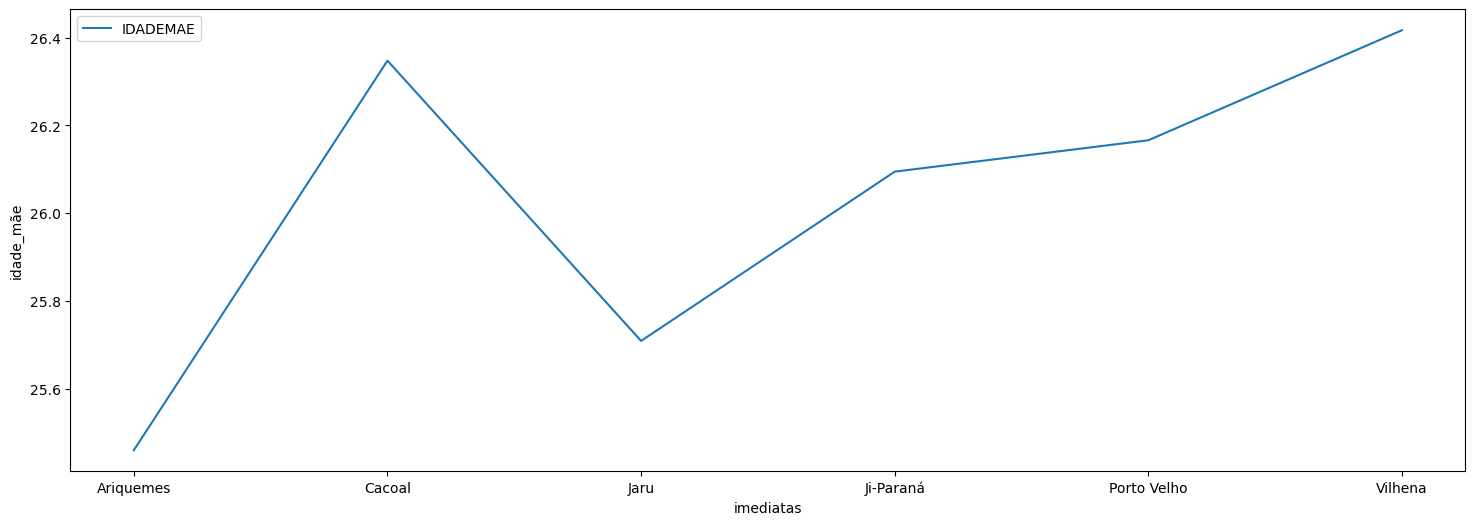

In [74]:
imediatas_idade_mae = sinasc_raw.set_index('munResNome').groupby(imediatas)['IDADEMAE'].mean().to_frame().plot(figsize=[18 ,6])
plt.ylabel('idade_mãe')
plt.xlabel('imediatas')
imediatas_idade_mae

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [82]:
IDH = {
    "Alta Floresta D'Oeste" : 'IDH-médio', 
    'Alto Alegre dos Parecis': 'IDH-baixo',
    'Novo Horizonte do Oeste': 'IDH-médio', 
    'Rolim de Moura': 'IDH-alto', 
    "São Felipe D'Oeste": 'IDH-médio',
    'Ariquemes': 'IDH-alto', 
    'Cujubim': 'IDH-médio', 
    'Alto Paraíso': 'IDH-médio', 
    'Monte Negro': 'IDH-médio', 
    'Jaru': 'IDH-médio',
    'Rio Crespo': 'IDH-médio', 
    'Porto Velho': 'IDH-alto', 
    'Cacaulândia': 'IDH-médio', 
    'Itapuã do Oeste': 'IDH-médio',
    'Ji-Paraná': 'IDH-alto', 
    'Buritis': 'IDH-médio', 
    'Vilhena':'IDH-alto', 
    'Vale do Anari':'IDH-baixo',
    'Candeias do Jamari':'IDH-médio', 
    'Costa Marques':'IDH-médio', 
    'Campo Novo de Rondônia':'IDH-baixo',
    "Machadinho D'Oeste": 'IDH-baixo', 
    'Colorado do Oeste': 'IDH-médio', 
    'Nova Mamoré': 'IDH-baixo', 
    'Urupá': 'IDH-médio',
    'Ouro Preto do Oeste': 'IDH-médio', 
    'Corumbiara':'IDH-médio', 
    'São Miguel do Guaporé':'IDH-médio',
    'Governador Jorge Teixeira': 'IDH-baixo', 
    "Santa Luzia D'Oeste":'IDH-médio',
    'Pimenta Bueno': 'IDH-alto', 
    'Mirante da Serra':'IDH-médio', 
    'Cerejeiras':'IDH-médio',
    'Presidente Médici':'IDH-médio',
    'Cacoal': 'IDH-alto',
    'Parecis':'IDH-médio', 
    "Espigão D'Oeste":'IDH-médio',
    'São Francisco do Guaporé':'IDH-médio', 
    'Ministro Andreazza':'IDH-médio',
    "Nova Brasilândia D'Oeste":'IDH-médio', 
    "Alvorada D'Oeste":'IDH-médio',
    'Primavera de Rondônia':'IDH-médio', 
    'Seringueiras':'IDH-baixo',
    'Castanheiras':'IDH-médio', 
    'Chupinguaia':'IDH-médio', 
    'Guajará-Mirim':'IDH-médio',
    'Theobroma':'IDH-baixo',
    'Nova União':'IDH-baixo', 
    'Teixeirópolis':'IDH-médio', 
    'Vale do Paraíso':'IDH-médio',
    'Pimenteiras do Oeste':'IDH-médio',
    'Cabixi':'IDH-médio'   
}

In [86]:
idh = sinasc_raw.set_index('munResNome')
idh.groupby(IDH)[['IDADEMAE']].agg(['mean','median', 'std'])

IDADEMAE                 
                 mean median       std
munResNome                            
IDH-alto    26.280332   26.0  6.415374
IDH-baixo   25.326944   25.0  6.194908
IDH-médio   25.884855   25.0  6.353274

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [90]:
IFDM = {
    "Espigão d'Oeste":'des_regular',
    'Seringueiras':'des_regular',
    "Alvorada d'Oeste":'des_regular',
    'Itapuã do Oeste':'des_regular',
    'Cabixi':'des_regular',
    'Novo Horizonte do Oeste':'des_regular',
    "Nova Brasilândia d'Oeste":'des_regular',
    'Vale do Paraíso':'des_regular',
    'Corumbiara':'des_regular',
    'Alto Paraíso':'des_regular',
    'Cacaulândia':'des_regular',
    'Vale do Anari':'des_regular',
    'Ministro Andreazza':'des_regular',
    'Costa Marques':'des_regular',
    'Nova União':'des_regular',
    'Guajará-Mirim':'des_regular',
    'Mirante da Serra':'des_regular',
    'Parecis':'des_regular',
    'Castanheiras':'des_regular',
    'Theobroma':'des_regular',
    "Machadinho d'Oeste":'des_regular',
    'Campo Novo de Rondônia':'des_regular',
    'Nova Mamoré':'des_regular',
    'Cujubim':'des_regular',
    'Alto Alegre dos Parecis':'des_regular',
    'Governador Jorge Teixeira': 'des_regular',
    "Ariquemes": 'des_moderado',
    "Vilhena": 'des_moderado',
    "Pimenta Bueno": 'des_moderado',
    "Porto Velho": 'des_moderado',
    "Ji-Paraná": 'des_moderado',
    "Cacoal": 'des_moderado',
    "Santa Luzia d'Oeste": 'des_moderado',
    "Rolim de Moura": 'des_moderado',
    "Chupinguaia": 'des_moderado',
    "São Miguel do Guaporé": 'des_moderado',
    "Pimenteiras do Oeste": 'des_moderado',
    "Teixeirópolis": 'des_moderado',
    "Colorado do Oeste": 'des_moderado',
    "Jaru": 'des_moderado',
    "Rio Crespo": 'des_moderado',
    "Primavera de Rondônia": 'des_moderado',
    "Alta Floresta d'Oeste": 'des_moderado',
    "Ouro Preto do Oeste": 'des_moderado',
    "São Francisco do Guaporé": 'des_moderado',
    "Candeias do Jamari": 'des_moderado',
    "Buritis": 'des_moderado',
    "São Felipe d'Oeste": 'des_moderado',
    "Presidente Médici": 'des_moderado',
    "Cerejeiras": 'des_moderado',
    "Monte Negro": 'des_moderado',
    "Urupá": 'des_moderado',
    
}

In [92]:
sinasc_raw.set_index('munResNome')['IDADEMAE'].groupby(IFDM).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
des_moderado,561938,26.226921,12,53,26.0,6.388564,40.813756
des_regular,93135,25.412005,11,52,25.0,6.376854,40.664266


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [94]:
PIB = {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 1 bilhão",
    "Vilhena": "Acima de 1 bilhão",
    "Ariquemes": "Acima de 1 bilhão",
    "Cacoal": "Acima de 1 bilhão",
    "Jaru": "Acima de 1 bilhão",
    "Rolim de Moura": "Acima de 1 bilhão",
    "Pimenta Bueno": "Acima de 1 bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}

In [96]:
sinasc_raw.set_index('munResNome')['IDADEMAE'].groupby(PIB).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
Acima de 1 bilhão,465846,26.265562,12,47,26.0,6.403777,41.008357
Acima de 100 Milhões,47508,25.638424,12,52,25.0,6.324801,40.003102
Acima de 200 Milhões,13051,25.146435,13,41,25.0,5.905771,34.878129
Acima de 300 Milhões,32184,25.706070,11,47,25.0,6.344987,40.258860
Acima de 500 Milhões,86486,25.785927,13,53,25.0,6.479551,41.984580
Até 100 Milhões,9998,26.519894,14,41,26.0,5.877767,34.548140


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [100]:
### A idade média da mãe parece ser similar entre os diferentes grupos de IDH, variando entre 25 e 26 anos.
### O desvio padrão da idade da mãe é relativamente baixo, indicando que a maioria das mães se concentra em torno da idade média.
### A média desses indicadores é ligeiramente inferior para o grupo com "des_regular", sugerindo um possível pior desempenho nesse grupo.
### A média da idade da mãe parece ser relativamente constante entre os diferentes grupos de renda/população, com exceção do grupo "Até 100 Milhões", que apresenta uma idade média ligeiramente superior.